<a href="https://colab.research.google.com/github/gabrielawad/talleresGoogleColab/blob/main/Taller_25_transbordo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

«*No todas las respuestas encuentran una pregunta a su medida*».

[Javier Bozalongo](https://www.escritores.org/biografias/25958-bozalongo-javier-)

# Taller 25 transbordo

## Transbordo impuro

El siguiente grafo representa los costos de envío de un producto desde dos plantas de producción bodegas hasta cuatro almacenes, pasando por dos bodegas de almacenamiento temporal del producto.

Formule y resuelva este problema de PL de manera que se envíen todos los productos y que lleguen a los almacenes desde las plantas con el menor costo posible.


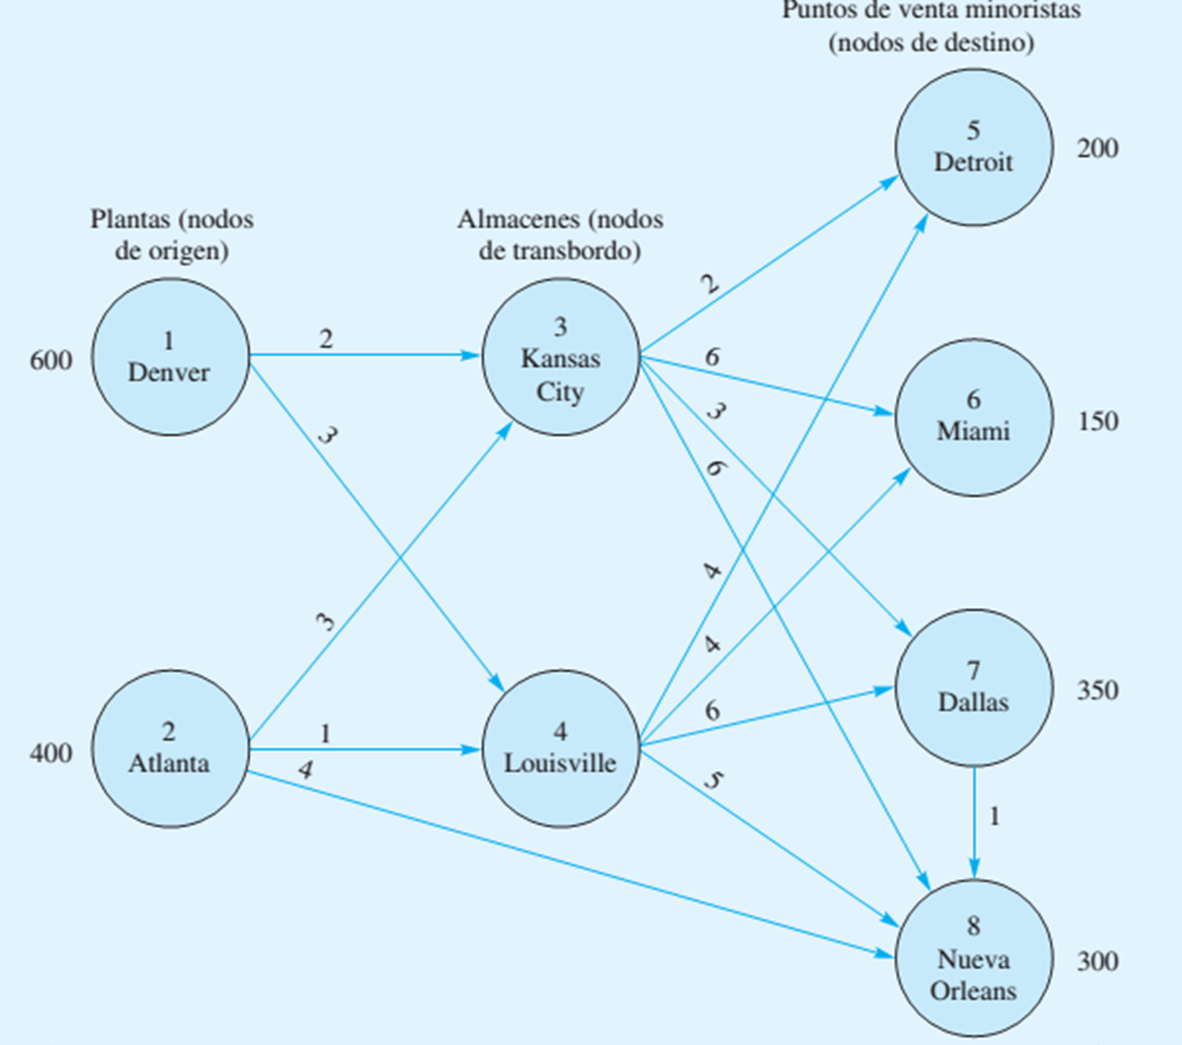

### forma algebraica

In [ ]:
# Importar las librerías que se van a utilizar
import cvxpy as cvx

# Crear las variables a optimizar (cantidad de producto)
q_den_kan = cvx.Variable(name="Denver - Kansas City", integer=True)
q_den_lou = cvx.Variable(name="Denver - Louisville", integer=True)
q_atl_kan = cvx.Variable(name="Atlanta - Kansas City", integer=True)
q_atl_lou = cvx.Variable(name="Atlanta - Louisville", integer=True)
q_atl_no = cvx.Variable(name="Atlanta - New Orleans", integer=True)
q_kan_det = cvx.Variable(name="Kansas City - Detroit", integer=True)
q_kan_mia = cvx.Variable(name="Kansas City - Miami", integer=True)
q_kan_dal = cvx.Variable(name="Kansas City - Dallas", integer=True)
q_kan_no = cvx.Variable(name="Kansas City - New Orleans", integer=True)
q_lou_det = cvx.Variable(name="Louisville - Detroit", integer=True)
q_lou_mia = cvx.Variable(name="Louisville - Miami", integer=True)
q_lou_dal = cvx.Variable(name="Louisville - Dallas", integer=True)
q_lou_no = cvx.Variable(name="Louisville - New Orleans", integer=True)
q_dal_no = cvx.Variable(name="Dallas - New Orleans", integer=True)

# Definir la función objetivo para minimizar los costos de distribución
obj = cvx.Minimize(2*q_den_kan + 3*q_den_lou + 3*q_atl_kan + 1*q_atl_lou
                   + 4*q_atl_no + 2*q_kan_det + 6*q_kan_mia + 3*q_kan_dal
                   + 6*q_kan_no+ 4*q_lou_det + 4*q_lou_mia + 6*q_lou_dal
                   + 5*q_lou_no + 1*q_dal_no)

# Definir las restricciones
restricciones = [
# Restricciones origen
q_den_kan + q_den_lou  == 600,
q_atl_kan + q_atl_lou + q_atl_no  == 400,

# Restricciones transbordo
#q_den_kan + q_atl_kan  == q_kan_det + q_kan_mia + q_kan_dal + q_kan_no,
q_den_kan + q_atl_kan - q_kan_det - q_kan_mia - q_kan_dal - q_kan_no == 0,

#q_den_Lou + q_atl_lou  == q_lou_det + q_lou_mia + q_lou_dal + q_lou_no,
q_den_lou + q_atl_lou - q_lou_det - q_lou_mia - q_lou_dal - q_lou_no == 0,

# Restricciones destino
q_kan_det + q_lou_det  == 200,
q_kan_mia + q_lou_mia  == 150,
q_kan_dal + q_lou_dal - q_dal_no == 350,
q_atl_no + q_kan_no + q_lou_no + q_dal_no == 300,

# Restricciones de no negatividad
q_den_kan >= 0,
q_den_lou >= 0,
q_atl_kan >= 0,
q_atl_lou >= 0,
q_atl_no >= 0,
q_kan_det >= 0,
q_kan_mia >= 0,
q_kan_dal >= 0,
q_kan_no >= 0,
q_lou_det >= 0,
q_lou_mia >= 0,
q_lou_dal >= 0,
q_lou_no >= 0,
q_dal_no >= 0
]

# Configurar el problema
prob = cvx.Problem(obj, restricciones)

# Obtener el valor óptimo
prob.solve()

# Mostrar el estado de la solución y el valor óptimo de la función objetivo
print("Estado de la solución:", prob.status,
      "      Valor mínimo:", "%.0f"% prob.value)

# mostrar los valores óptimos de las variables de decisión
print ("Valor óptimo de", q_den_kan, ":", "%.0f"% q_den_kan.value, "\n",
       "Valor óptimo de", q_den_lou, ":", "%.0f"% q_den_lou.value, "\n",
       "Valor óptimo de", q_atl_kan, ":", "%.0f"% q_atl_kan.value, "\n",
       "Valor óptimo de", q_atl_lou, ":", "%.0f"% q_atl_lou.value, "\n",
       "Valor óptimo de", q_atl_no, ":", "%.0f"% q_atl_no.value, "\n",
       "Valor óptimo de", q_kan_det, ":", "%.0f"% q_kan_det.value, "\n",
       "Valor óptimo de", q_kan_mia, ":", "%.0f"% q_kan_mia.value, "\n",
       "Valor óptimo de", q_kan_dal, ":", "%.0f"% q_kan_dal.value, "\n",
       "Valor óptimo de", q_kan_no, ":", "%.0f"% q_kan_no.value, "\n",
       "Valor óptimo de", q_lou_det, ":", "%.0f"% q_lou_det.value, "\n",
       "Valor óptimo de", q_lou_mia, ":", "%.0f"% q_lou_mia.value, "\n",
       "Valor óptimo de", q_lou_dal, ":", "%.0f"% q_lou_dal.value, "\n",
       "Valor óptimo de", q_lou_no, ":", "%.0f"% q_lou_no.value, "\n",
       "Valor óptimo de", q_dal_no, ":", "%.0f"% q_dal_no.value)

### forma matricial

In [ ]:
# Importar las librerías que se van a utilizar
import numpy as np
import cvxpy as cvx

# arreglo X: variables de decisión
# arreglo c: coeficientes de la función objetivo
# arreglo A: coeficientes de técnicos
# arreglo b: restricciones

# Crear el arreglo con las variables de decisión
Q = cvx.Variable((14, 1), integer=True)

# Crear el arreglo con los coeficientes de la función objetivo
c = np.array([2, 3, 3, 1, 4, 2, 6, 3, 6, 4, 4, 6, 5, 1]).reshape((1, 14))

# Crear la función objetivo
obj_arr = cvx.Minimize(c@Q)

# Crear arreglo de los ceficientes técnicos
A_arr = np.array([
# Despachar Denver
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

# Despachar Atlanta
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],

# Transbordo en Kansas City
[1, 0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0],

# Transbordo en Louisville
[0, 1, 0, 1, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0],

# Destino en Detriot
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],

# Destino en Miami
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],

# Destino en Dallas
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, -1],

# Destino en New Orleans
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
             ]).reshape((8, 14))

# Crear los coeficientes de las restricciones
b = np.array([600, 400, 0, 0,  200, 150, 350, 300]).reshape((8, 1))

# Crear las restricciones técnicas
restricciones_tec = [A_arr @ Q == b]

# Crear las restricciones de no negatividad
A_noneg = np.identity(14)

b_nonneg = np.zeros((14, 1))

restricciones_no_neg = [A_noneg @ Q >= b_nonneg]

# Crear el problema de optimización
prob_arr = cvx.Problem(obj_arr, restricciones_tec + restricciones_no_neg)

# Resolver el problema
prob_arr.solve()

# Mostrar el estado de la solución y el valor óptimo de la función objetivo
print("Estado de la solución:", prob_arr.status,
      "      Valor mínimo:", "%.0f"% prob_arr.value)

# Configurar la impresión sin decimales
np.set_printoptions(precision=1, suppress=True)

# Crear una lista con los nombres de las rutas
rutas = ["Denver - Kansas City", "Denver - Louisville", "Atlanta - Kansas City",
         "Atlanta - Louisville", "Atlanta - New Orleans",
         "Kansas City - Detroit", "Kansas City - Miami",
         "Kansas City - Dallas", "Kansas City - New Orleans",
         "Louisville - Detroit", "Louisville - Miami", "Louisville - Dallas",
         "Louisville - New Orleans", "Detriot - New Orleans"]

# mostrar los valores óptimos de las variables de decisión
for i in range(14):
  if Q.value[i] > 0:
    print(rutas[i],":", "%.0f"% Q.value[i,0])


# Ejercicios

## Transbordo en telecomunicaciones

El siguiente grafo representa una red de comunicaciones en la que los nodos O1 y O2 son los servidores de correo electrónico de los computadores de varias ciudades europeas, T1 y T2 son nodos de distribución intermedios y D1, D2 y D3 representan los servidores de correo que dan servicio a los ordenadores de varias ciudades americanas.

 Se estima que de O1 salen 1000 mensajes al día, y 1200 de O2. Se estima que D1 recibe recibir 800 mensajes finales diarios, D2 900, y D3 500.

 Se supone que no hay problemas de capacidad en las líneas que conectan estos nodos, por lo que por cada tramo se pueden transmitir tantos mensajes como sean necesarios.

 Los números indicados en la red representan el tiempo que tarda, en milésimas de segundo, la transmisión del mensaje por ese tramo de la red.

Formule y resuelva este problema de PL, tanto en forma algebraica como en forma matricial, de manera que se transmitan y se reciban todos los mensajes en el menor tiempo posible.

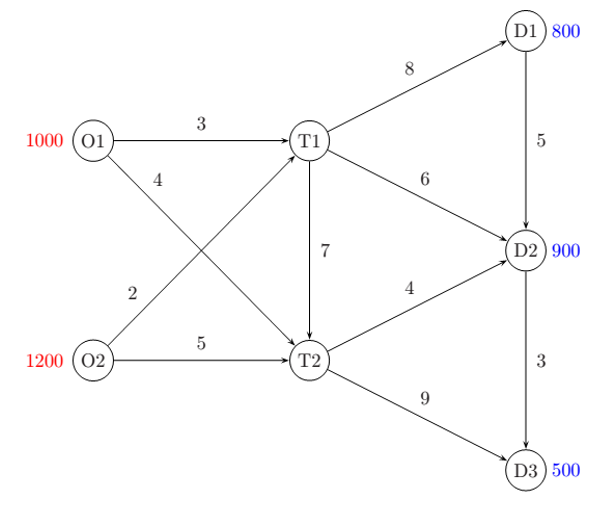

## Forma algebraica

In [ ]:
# Escriba aqui su código


## Forma matricial

In [ ]:
# Escriba aqui su código
